In [1]:
# Upload your cleaned dataset
from google.colab import files
uploaded = files.upload()


Saving cleaned_sentiment_dataset.csv to cleaned_sentiment_dataset.csv


In [2]:
# Read the uploaded CSV
import pandas as pd

df = pd.read_csv("cleaned_sentiment_dataset.csv")
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,cleaned_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying beautiful day park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic terrible morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,finished amazing workout 💪
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying new recipe dinner tonight


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter


<ipython-input-4-a08e0dea378f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='Set2')


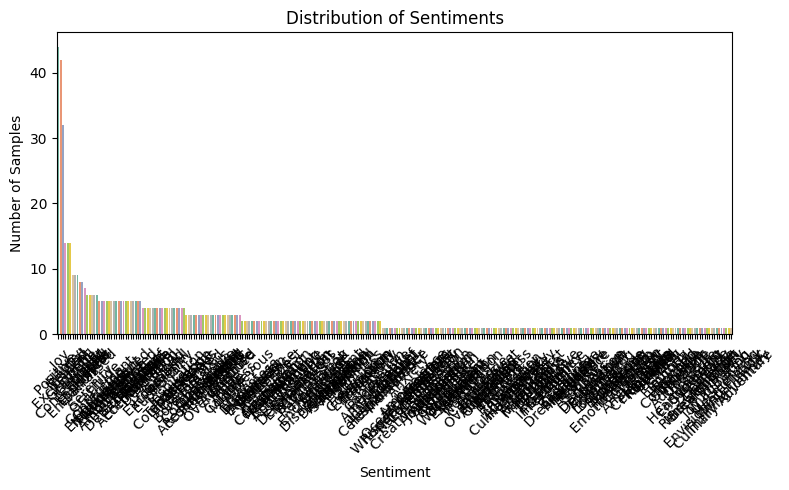

In [4]:
# Plot how many texts are in each sentiment class
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='Set2')
plt.title("Distribution of Sentiments")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-5-b3748c69bc67>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


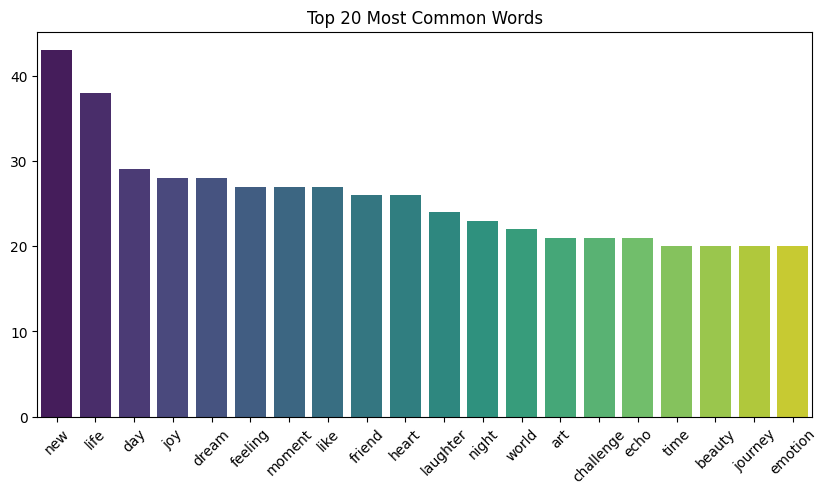

In [5]:
# Combine all cleaned text into one string
all_words = ' '.join(df['cleaned_text'])
word_counts = Counter(all_words.split())
common_words = word_counts.most_common(20)

# Plot
words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 20 Most Common Words")
plt.xticks(rotation=45)
plt.show()


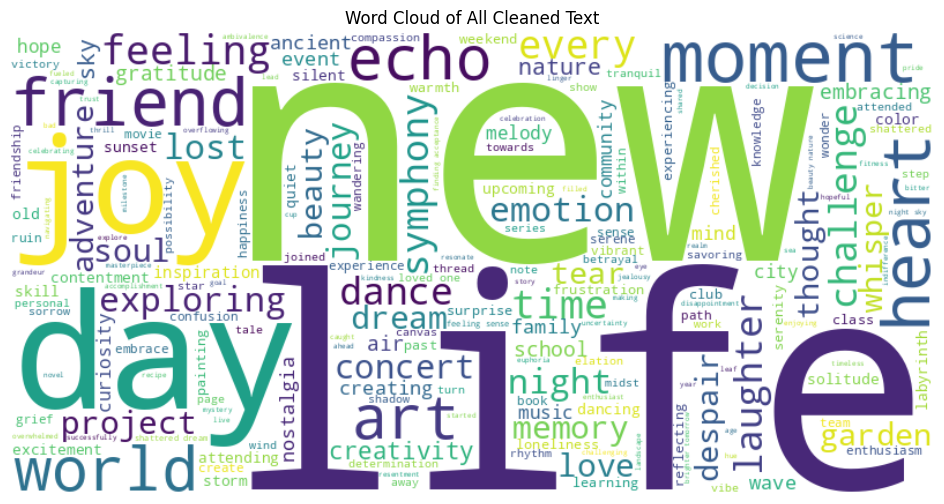

In [6]:
# Create a word cloud from all text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Cleaned Text")
plt.show()


In [7]:
# Create word clouds for each sentiment category
sentiments = df['Sentiment'].unique()

for sentiment in sentiments:
    text = ' '.join(df[df['Sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Sentiment: {sentiment}")
    plt.show()


Output hidden; open in https://colab.research.google.com to view.